### Vấn đề: Xây dựng mô hình dự đoán giá trung bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, kinh doanh

1. Tạo mô hình dự đoán giá bơ trung bình của Mỹ (sử dụng các thuật toán Regression)

#### 2. Dự đoán giá bơ hữu cơ của vùng California (sử dụng các thuật toán Time Series)

3. Dự đoán giá bơ thường của vùng California (sử dụng mô hình ở câu 1 và 2)

4. Chọn 1 vùng mà bạn cho rằng trong tương lai có thể mở rộng trồng trọt, sản xuất và kinh doanh bơ thường và/hoặc bơ hữu cơ. Hãy chứng minh.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import warnings
warnings.filterwarnings("ignore")

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('avocado.csv')
print(data.shape)
data

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [25]:
df = data[['Date','AveragePrice']][(data['type']=='organic')&(data['region']=='California')]
print(df.shape)
df.head()

(169, 2)


,Date,AveragePrice
9438,2015-12-27,1.45
9439,2015-12-20,1.35
9440,2015-12-13,1.39
9441,2015-12-06,1.48
9442,2015-11-29,1.75


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [27]:
df = df.sort_values('Date')
df.reset_index(inplace=True,drop=True)
df

,Date,AveragePrice
0,2015-01-04,1.24
1,2015-01-11,1.10
2,2015-01-18,1.24
3,2015-01-25,1.30
4,2015-02-01,1.11
...,...,...
164,2018-02-25,1.82
165,2018-03-04,1.57
166,2018-03-11,1.58
167,2018-03-18,1.75


In [28]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2015-01-04,1.24
1,2015-01-11,1.10
2,2015-01-18,1.24
3,2015-01-25,1.30
4,2015-02-01,1.11


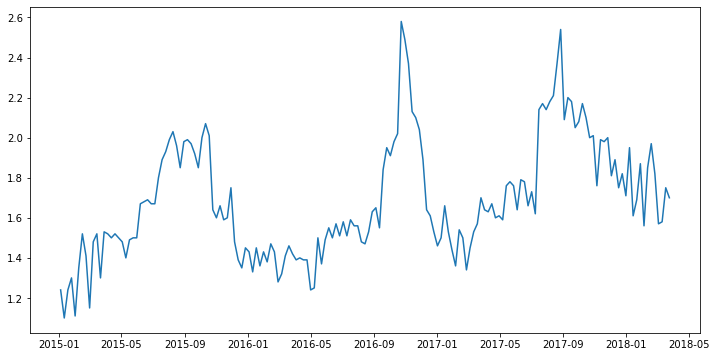

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'],df['y'])
plt.show()

In [30]:
df = df.set_index('ds')
df.head()

,y
ds,
2015-01-04,1.24
2015-01-11,1.10
2015-01-18,1.24
2015-01-25,1.30
2015-02-01,1.11


In [31]:
df.index.freq = 'W-SUN'

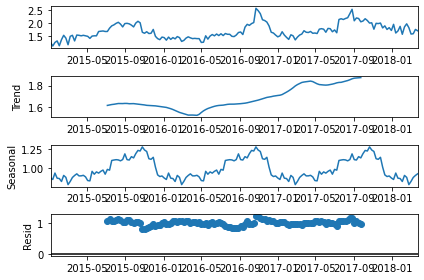

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df1, model='multiplicative')
result.plot()
plt.show()

### Nhận xét:
- Giá bơ hữu cơ trung bình của vùng California có xu hướng tăng nhưng không ổn định
- Có biểu hiện theo mùa

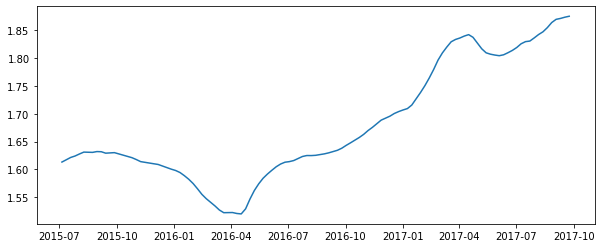

In [33]:
plt.figure(figsize=(10,4))
plt.plot(result.trend)
plt.show()

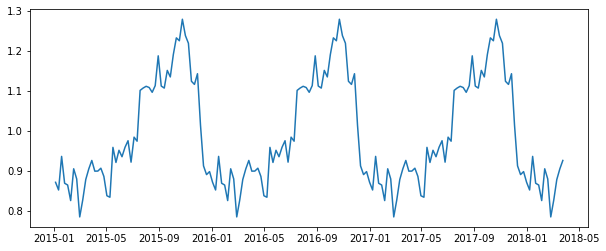

In [34]:
plt.figure(figsize=(10,4))
plt.plot(result.seasonal)
plt.show()

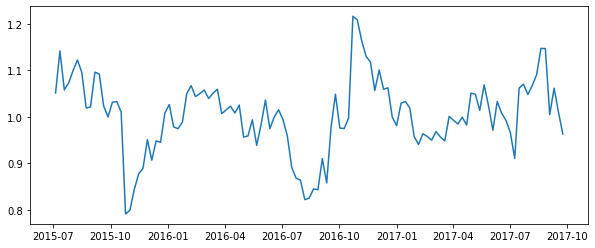

In [35]:
plt.figure(figsize=(10,4))
plt.plot(result.resid)
plt.show()

### Splitting

In [36]:
len(df)*(75/100)

126.75

In [37]:
train, test = df.iloc[:127,:], df.iloc[127:,:]
train.shape, test.shape

((127, 1), (42, 1))

# Models
## HoltWinters

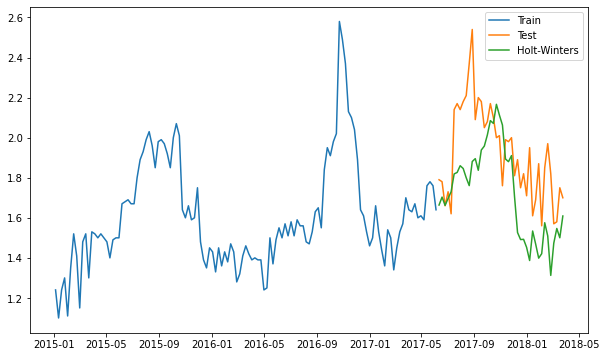

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, seasonal='mul').fit() # seasonal_periods=52
pred = model.predict(start=test.index[0], 
                     end=test.index[-1])

plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

In [47]:
mse = mean_squared_error(test,pred)
mae = mean_absolute_error(test,pred)
r2 = r2_score(test,pred)

print('>>> MSE:', mse)
print('>>> MAE:', mae)
print('>>> score:', r2)

>>> MSE: 0.08212281383136212
>>> MAE: 0.23166532300862558
>>> score: -0.5640684298331979


### Đánh giá
- Mô hình HoltWinters cho ra kết quả kém
- Dự đoán xu hướng khá giống nhưng chênh lệch giá quá lớn

## pmdarima

In [48]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[52]             : AIC=inf, Time=47.09 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-50.107, Time=0.71 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=10.69 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=9.62 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=-71.497, Time=7.39 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=inf, Time=39.61 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=27.62 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=-63.984, Time=7.07 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=-71.242, Time=67.85 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=-80.600, Time=10.78 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=-52.418, Time=1.07 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=-81.371, Time=61.01 sec
 ARIMA(0,1,1)(2,1,1)[52]             : AIC=-79.371, Time=48.36 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=inf, Time=37.45 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=-80.1

In [49]:
model = stepwise_model.fit(train)

In [50]:
pred = model.predict(n_periods=len(test))
pred

array([1.66939257, 1.6997861 , 1.66619041, 1.68998287, 1.75200443,
       1.8386055 , 1.85481305, 1.89441952, 1.89363245, 1.84402599,
       1.79180766, 1.91161089, 1.92500982, 1.87781844, 1.94338179,
       1.93456238, 2.01998287, 2.08998287, 2.06397209, 2.01007183,
       1.95307722, 1.95189662, 1.82411495, 1.82051926, 1.8991419 ,
       1.66992896, 1.52554621, 1.48894514, 1.52776454, 1.49076976,
       1.4383558 , 1.57195155, 1.46835435, 1.48397292, 1.4237735 ,
       1.54436362, 1.50436422, 1.35096618, 1.41475655, 1.501358  ,
       1.54796133, 1.56574165])

In [53]:
pred = pd.DataFrame(pred,index = test.index)
pred

,0
ds,
2017-06-11,1.669393
2017-06-18,1.699786
2017-06-25,1.666190
2017-07-02,1.689983
2017-07-09,1.752004
2017-07-16,1.838606
2017-07-23,1.854813
2017-07-30,1.894420
2017-08-06,1.893632


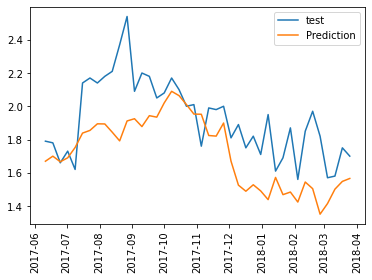

In [54]:
plt.plot(test, label='test')
plt.plot(pred, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

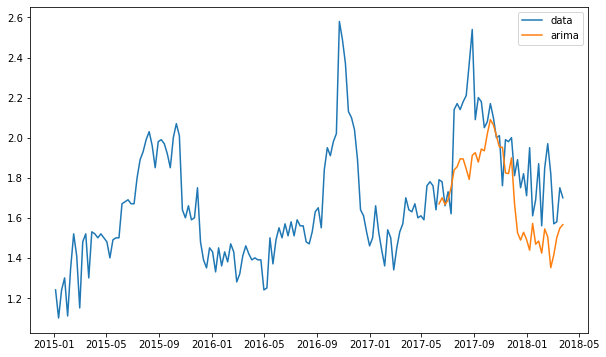

In [55]:
plt.figure(figsize=(10,6))
plt.plot(df, label='data')
plt.plot(pred, label='arima')
plt.legend(loc='best')
plt.show()

In [57]:
mse = mean_squared_error(test,pred)
mae = mean_absolute_error(test,pred)
r2 = r2_score(test,pred)

print('>>> MSE:', mse)
print('>>> MAE:', mae)
print('>>> score:', r2)

>>> MSE: 0.07152215122049718
>>> MAE: 0.2186106867728556
>>> score: -0.3621737193205492


### Đánh giá
- Mô hình ARIMA cho ra kết quả kém
- Dự đoán xu hướng khá giống nhưng chênh lệch giá quá lớn

## Đánh giá tổng thể
- Dữ liệu bất ổn định
- Phương sai dao động
- Giá trị trung bình tăng theo thời gian
- Có biểu hiện theo mùa
- Cả 2 mô hình cho ra kết quả kém không sử dụng được
#### => Sử dụng thuật toán khác